In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import numpy as np

# Material

### Scikit learn

In [1]:
import sklearn as sk

### Data Preparation

In [2]:
import pandas as pd

In [5]:
# !wget -P data https://github.com/vafaei-ar/medical_datascience/blob/main/intermediate/data/Life%20Expectancy%20Data.csv

In [3]:
df = pd.read_csv('data/Life Expectancy Data.csv')

In [11]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [8]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [9]:
df.shape

(2938, 22)

In [10]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
df = df.dropna()

In [15]:
df.shape

(1649, 22)

In [16]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [19]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [22]:
df.drop('Country', axis=1, inplace=True)

/home/gf/miniconda3/envs/gpu1/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [27]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [28]:
df.loc[df['Status']=='Developing', 'Status'] = 1

/home/gf/miniconda3/envs/gpu1/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
df.loc[df['Status']=='Developed', 'Status'] = 0

/home/gf/miniconda3/envs/gpu1/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [32]:
df['Status'].unique()

array([1, 0], dtype=object)

In [35]:
df['Status'] = pd.to_numeric(df['Status'])

/home/gf/miniconda3/envs/gpu1/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [36]:
df['Status'].unique()

array([1, 0])

In [38]:
df.dtypes

Year                                 int64
Status                               int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [40]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy '>

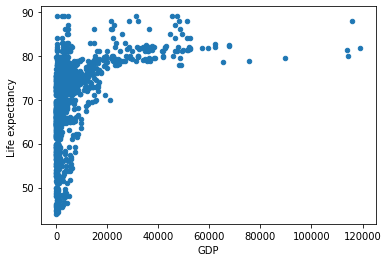

In [42]:
df.plot.scatter('GDP','Life expectancy ')

In [23]:
y = df['Life expectancy ']

x = df.drop('Life expectancy ', axis=1)

### Training a model

In [21]:
from sklearn.linear_model import LinearRegression

In [57]:
model = LinearRegression()

In [59]:
model.fit(x,y)

LinearRegression()

In [64]:
x.shape

(1649, 19)

In [65]:
model.coef_

array([-1.29874789e-01, -1.64364041e-02,  8.88086801e-02, -9.83150370e-02,
        3.10650869e-04, -2.32723002e-03, -1.10707305e-05,  3.15528061e-02,
       -6.66491382e-02,  5.66159110e-03,  9.61044099e-02,  1.35422582e-02,
       -4.49509516e-01,  2.95015607e-05, -6.52688011e-10, -2.28139560e-03,
       -5.31044786e-02,  1.04700581e+01,  9.06296651e-01])

In [66]:
x.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [61]:
model.intercept_

313.35279424005597

### Predict, Evaluate

In [71]:
x.iloc[1:]

Year                                 2014.000000
Adult Mortality                       271.000000
infant deaths                          64.000000
Alcohol                                 0.010000
percentage expenditure                 73.523582
Hepatitis B                            62.000000
Measles                               492.000000
 BMI                                   18.600000
under-five deaths                      86.000000
Polio                                  58.000000
Total expenditure                       8.180000
Diphtheria                             62.000000
 HIV/AIDS                               0.100000
GDP                                   612.696514
Population                         327582.000000
 thinness  1-19 years                  17.500000
 thinness 5-9 years                    17.500000
Income composition of resources         0.476000
Schooling                              10.000000
Name: 1, dtype: float64

In [74]:
x.iloc[1:4].shape

(3, 19)

In [75]:
model.predict(x.iloc[1:3])

array([62.74613647, 62.74361474])

In [76]:
y.iloc[1:3]

1    59.9
2    59.9
Name: Life expectancy , dtype: float64

In [77]:
model.score(x,y)

0.837883113220785

### Regression Metrics

In [92]:
y_pred.shape,x.shape,y.shape

((1649,), (1649, 19), (3,))

In [95]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
y_pred = model.predict(x)
r2_score(y, y_pred)

0.837883113220785

In [97]:
100*mean_absolute_percentage_error(y, y_pred)

4.062359575518207

### Classification (LR)

In [3]:
df = pd.read_csv('data/diabetes-dataset.csv')
df.shape

(2000, 9)

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']
x.shape,y.shape

((2000, 8), (2000,))

In [7]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(max_iter=1000,)

In [13]:
model.fit(x,y)

LogisticRegression(max_iter=1000)

In [14]:
model.predict(x.iloc[1:4])

array([0, 1, 0])

In [15]:
model.score(x,y)

0.783

### Classification Metrics

In [18]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [17]:
y_pred = model.predict(x)
y_true = y
accuracy_score(y_true, y_pred)

0.783

In [19]:
precision_score(y_true, y_pred)

0.7376425855513308

In [20]:
recall_score(y_true, y_pred)

0.5672514619883041

### Overfit

In [60]:
df = pd.read_csv('data/Life Expectancy Data.csv')
df = df.dropna()
df.drop('Country', axis=1, inplace=True)
df.loc[df['Status']=='Developing', 'Status'] = 1
df.loc[df['Status']=='Developed', 'Status'] = 0
df['Status'] = pd.to_numeric(df['Status'])
y = df['Life expectancy ']
x = df.drop('Life expectancy ', axis=1)

In [62]:
x.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [63]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [64]:
from sklearn.preprocessing import PolynomialFeatures

In [73]:
pf = PolynomialFeatures(degree=2,include_bias=False)
x2 = pf.fit_transform(x)

In [74]:
x.shape,x2.shape

((1649, 20), (1649, 230))

In [75]:
model = LinearRegression()
model.fit(x,y)
model.score(x,y)

0.8385763772849805

In [76]:
model = LinearRegression()
model.fit(x2,y)
model.score(x2,y)

0.9004949518115274

In [79]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

In [80]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7860147209698695

In [81]:
x_train = x2[:1000]
y_train = y[:1000]
x_test = x2[1000:]
y_test = y[1000:]

In [82]:
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.4779116299555489

### Regularization

In [104]:
from sklearn.linear_model import Ridge

In [102]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]
model = Ridge(alpha=0.01,normalize=True)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7917824914860674

In [103]:
x_train = x2[:1000]
y_train = y[:1000]
x_test = x2[1000:]
y_test = y[1000:]
model = Ridge(alpha=0.01,normalize=True)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8364812824762394

### Cross Validation

In [118]:
from sklearn.model_selection import cross_val_score
model = Ridge(alpha=0.01,normalize=True)
scores = cross_val_score(model, x, y, cv=5)
scores

array([0.83583611, 0.73770736, 0.8402722 , 0.77893666, 0.78518901])

In [119]:
scores.mean(),scores.std()

(0.7955882682836409, 0.03834621895263661)

In [123]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
# kf.get_n_splits(x)

scores = []
for train_index, test_index in kf.split(x):
#     print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(X_train.shape, X_test.shape)

    model = Ridge(alpha=0.01,normalize=True)
    model.fit(x_train,y_train)
    scr = model.score(x_test,y_test)
    scores.append(scr)
scores

(1237, 20) (412, 20)
(1237, 20) (412, 20)
(1237, 20) (412, 20)
(1237, 20) (412, 20)


[0.8279530373537376,
 0.7458999134444695,
 0.8379941426007761,
 0.7758191373512506]

In [120]:
x.shape

(1649, 20)

### K-Nearest Neighbours

In [125]:
df = pd.read_csv('data/diabetes-dataset.csv')
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
model = KNeighborsClassifier()
scores = cross_val_score(model, x, y, cv=5)
scores.mean(),scores.std()

(0.826, 0.03750333318519835)

### Support Vector Machines

In [129]:
from sklearn.svm import SVC
model = SVC()
scores = cross_val_score(model, x, y, cv=5)
scores.mean(),scores.std()

(0.7705, 0.03299242337264724)

### Decision tree

In [130]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
scores = cross_val_score(model, x, y, cv=5)
scores.mean(),scores.std()

(0.9914999999999999, 0.011357816691600563)

### Ensemble Learning (Random Forests)

In [131]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
scores = cross_val_score(model, x, y, cv=5)
scores.mean(),scores.std()

(0.993, 0.014000000000000012)

In [133]:
x.shape

(2000, 8)

In [132]:
model = RandomForestClassifier()
model.fit(x,y)
model.feature_importances_

array([0.07687919, 0.24820968, 0.09204116, 0.07033713, 0.07394986,
       0.16765698, 0.12515431, 0.14577168])

In [134]:
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### Neural Networks I (Multilayer Perceptron or Dense layers)

In [135]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
scores = cross_val_score(model, x, y, cv=5)
scores.mean(),scores.std()

/home/gf/miniconda3/envs/gpu1/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(0.7699999999999999, 0.0444128359824049)

### Keras I (Dense layers)

In [150]:
from keras.layers import Input
from keras.layers import Dense
from keras.models import Model

In [151]:
x.shape

(2000, 8)

In [152]:
inp_layer = Input(shape=(8,))
hidden = Dense(10, activation='relu')(inp_layer)
output = Dense(1, activation='sigmoid')(hidden)
model = Model(inputs=inp_layer, outputs=output)

In [153]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense (Dense)                (None, 10)                90        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [155]:
model.compile(loss='BinaryCrossentropy', optimizer='adam')
model.fit(x_train, y_train)

47/47 [==============================] - 33s 6ms/step - loss: 22.7131


In [158]:
y_pred = model.predict(x_test)

In [166]:
y_pred = (y_pred>0.5).astype(int)

In [168]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.78      0.18      0.30       339
           1       0.34      0.89      0.49       161

    accuracy                           0.41       500
   macro avg       0.56      0.54      0.40       500
weighted avg       0.64      0.41      0.36       500



### MNIST

In [2]:
import pylab as plt

In [11]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data(path="mnist.npz")
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, '7')

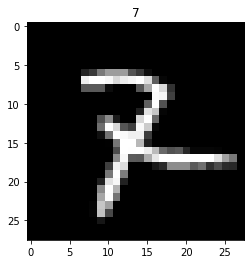

In [12]:
ii = np.random.randint(10000)
plt.imshow(x_train[ii],cmap='gray')
plt.title(y_train[ii])

### Keras II (Convolutions)

In [17]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [30]:
x_train = x_train[...,None]
x_test = x_test[...,None]

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [33]:
inp_layer = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(32, activation='relu')(flat)
output = Dense(10, activation='softmax')(hidden1)
model = Model(inputs=inp_layer, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1283

In [34]:
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics=['acc'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.6812 - acc: 0.8468 - val_loss: 0.1400 - val_acc: 0.9590
Epoch 2/5
938/938 [==============================] - 52s 56ms/step - loss: 0.1116 - acc: 0.9665 - val_loss: 0.0925 - val_acc: 0.9727
Epoch 3/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0767 - acc: 0.9765 - val_loss: 0.0739 - val_acc: 0.9782
Epoch 4/5
938/938 [==============================] - 51s 55ms/step - loss: 0.0592 - acc: 0.9823 - val_loss: 0.0648 - val_acc: 0.9809
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0526 - acc: 0.9839 - val_loss: 0.0575 - val_acc: 0.9827


In [41]:
y_pred = model.predict(x_test[0:4])

In [44]:
y_pred.shape

(4, 10)

In [45]:
np.argmax(y_pred,axis=1)

array([7, 2, 1, 0])

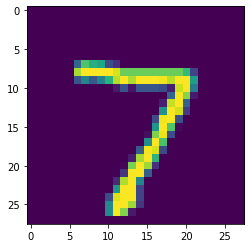

In [46]:
plt.imshow(x_test[0])

### Augmentation

In [53]:
from keras.preprocessing.image import ImageDataGenerator

In [52]:
inp_layer = Input(shape=(28,28,1))
conv1 = Conv2D(32, kernel_size=3, activation='relu')(inp_layer)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(32, activation='relu')(flat)
output = Dense(10, activation='softmax')(hidden1)
model = Model(inputs=inp_layer, outputs=output)
model.compile(loss='CategoricalCrossentropy', optimizer='adam',metrics=['acc'])

In [54]:
datagen = ImageDataGenerator(rotation_range=5,
                             width_shift_range=0.02,
                             height_shift_range=0.02,
                             zoom_range=0.02,
                             )
# prepare iterator
train_set = datagen.flow(x_train, y_train, batch_size=64)

In [55]:
model.fit(train_set, validation_data=(x_test, y_test), batch_size=64,epochs=5)

Epoch 1/5
938/938 [==============================] - 112s 119ms/step - loss: 0.4999 - acc: 0.8883 - val_loss: 0.1264 - val_acc: 0.9666
Epoch 2/5
938/938 [==============================] - 87s 93ms/step - loss: 0.1057 - acc: 0.9681 - val_loss: 0.0925 - val_acc: 0.9723
Epoch 3/5
938/938 [==============================] - 85s 90ms/step - loss: 0.0813 - acc: 0.9753 - val_loss: 0.0750 - val_acc: 0.9792
Epoch 4/5
938/938 [==============================] - 92s 98ms/step - loss: 0.0700 - acc: 0.9791 - val_loss: 0.0711 - val_acc: 0.9807
Epoch 5/5
938/938 [==============================] - 78s 83ms/step - loss: 0.0550 - acc: 0.9831 - val_loss: 0.0698 - val_acc: 0.9817


### Anomaly Detection

(1000, 2) (1000,)


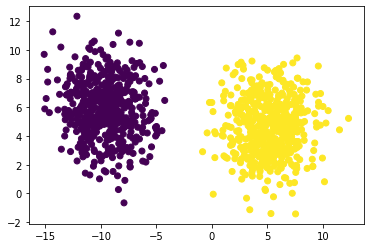

In [80]:
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=1000, cluster_std=2.0, centers=2, n_features=2)
print(x.shape,y.shape)
# plt.scatter(x[:,0],x[:,1])
plt.scatter(*x.T,c=y)

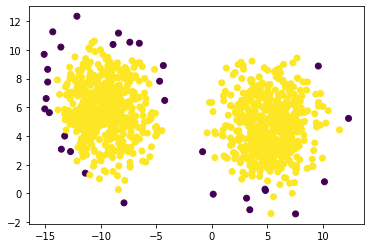

In [82]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=10)
yo = clf.fit_predict(x)
plt.scatter(*x.T,c=yo)

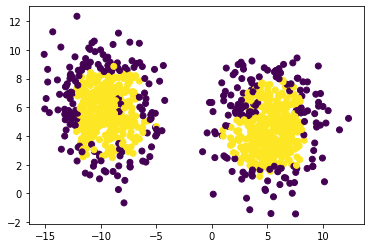

In [85]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(n_estimators=10)
yo = clf.fit_predict(x)
plt.scatter(*x.T,c=yo)